**Checkpoint** **2 – implementation Updates**
MobileNetV3 and MobileNetV2 Implementation Using Python and TensorFlow

Manju Shree Kumaravel

Creating a full MobileNetV3 and MobileNetV2 implementation in Python requires several steps and may span multiple cells. Here, I'll provide you with a more detailed code example using TensorFlow, broken down into multiple cells with explanations for each part.

**Cell 1: Import Necessary Libraries:**

In this cell, we'll import the libraries and modules required for building and training the MobileNetV3 model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


**Cell 2: Define MobileNetV3 Architecture**

This cell defines the MobileNetV3 architecture. We'll create separate functions for building different components of the model.

In [ ]:
def hard_swish(x):
    return x * tf.nn.relu6(x + 3) / 6

def return_activation(x, nl):
    if nl == 'HS':
        x = Activation(hard_swish)(x)
    if nl == 'RE':
        x = Activation('relu')(x)
    return x

def MobileNetV3Small(input_shape, num_classes):
    input = Input(shape=input_shape)
    x = Conv2D(16, (3, 3), strides=(2, 2), padding='same')(input)
    x = BatchNormalization()(x)
    x = return_activation(x, 'HS')

    # Define the MobileNetV3 architecture

    x = GlobalAveragePooling2D()(x)
    x = Dense(1280)(x)
    x = return_activation(x, 'HS')
    x = Dropout(0.2)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model


**Cell 3: Create the MobileNetV3 and MobileNetv2 Model**

Now, we'll create an instance of the MobileNetV3 model using the defined architecture.

In [ ]:
input_shape = (32, 32, 3)  # the input shape can be adjusted based on future data
num_classes = 10  #  the number of classes  can be adjusted in future for classification task

model_v2 = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",

)

model_v3 = tf.keras.applications.MobileNetV3Small(
    input_shape=None,
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=10,
    classifier_activation="softmax",

)

In [ ]:
input_shape = (32, 32, 3)  # the input shape can be adjusted based on future data
num_classes = 10  #  the number of classes  can be adjusted in future for classification task
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2,MobileNetV3Small

# Define the input shape
input_shape = (32, 32, 3)
num_classes = 10  # The number of classes can be adjusted for your task

# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet"
)
base_model_v3 = MobileNetV3Small(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet"
)


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(num_classes, activation='softmax')(x)

x1 = GlobalAveragePooling2D()(base_model_v3.output)
x1 = Dense(num_classes, activation='softmax')(x1)

# Create the final model
model_v2 = Model(inputs=base_model.input, outputs=x)

model_v3 = Model(inputs=base_model_v3.input,outputs=x1)


**Cell 4: Compile the Model**

Compile the model by specifying the optimizer, loss function, and evaluation metrics.

In [ ]:
model_v2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_v3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Cell 5: Load and Preprocess Data (CIFAR-10 Dataset)**
Here, we'll load and preprocess a sample dataset (CIFAR-10) as an example. Replace this part with your dataset loading and preprocessing.

In [ ]:
input_shape = (32, 32, 3)  # the input shape can be adjusted based on future data
num_classes = 10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)
# Preprocess the data (e.g., normalize, one-hot encoding)
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
print(train_images.shape)


170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 32, 32, 3)


**Cell 6: Train the Model**

Train the MobileNetV3 model on your dataset. Make sure you have your dataset prepared and loaded correctly.

In [ ]:
# Specify training parameters (e.g., batch size, epochs)
batch_size = 64
epochs = 10

# Train the model
history = model_v2.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 47s 34ms/step - loss: 1.6280 - accuracy: 0.4519 - val_loss: 16.5579 - val_accuracy: 0.1050
Epoch 2/10
782/782 [==============================] - 26s 34ms/step - loss: 1.4131 - accuracy: 0.5141 - val_loss: 6.0328 - val_accuracy: 0.1509
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 1.2075 - accuracy: 0.5896 - val_loss: 3.7829 - val_accuracy: 0.2981
Epoch 4/10
782/782 [==============================] - 26s 33ms/step - loss: 1.3583 - accuracy: 0.5381 - val_loss: 5.9474 - val_accuracy: 0.1556
Epoch 5/10
782/782 [==============================] - 26s 34ms/step - loss: 1.3665 - accuracy: 0.5378 - val_loss: 3.7661 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 27s 35ms/step - loss: 1.3348 - accuracy: 0.5426 - val_loss: 2.2378 - val_accuracy: 0.4612
Epoch 7/10
782/782 [==============================] - 26s 34ms/step - loss: 1.3672 - accuracy: 0.5328 - val_loss: 3.7214 - val_accuracy

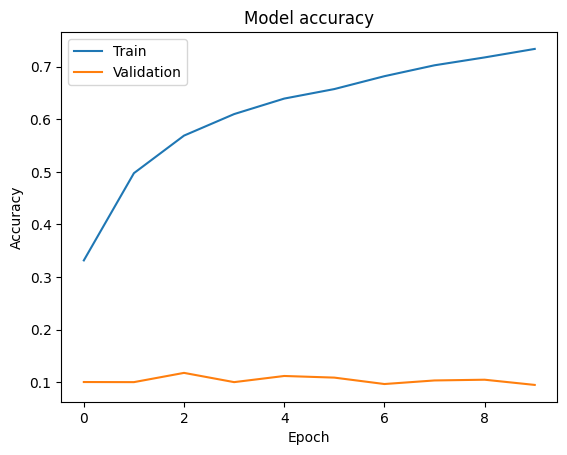

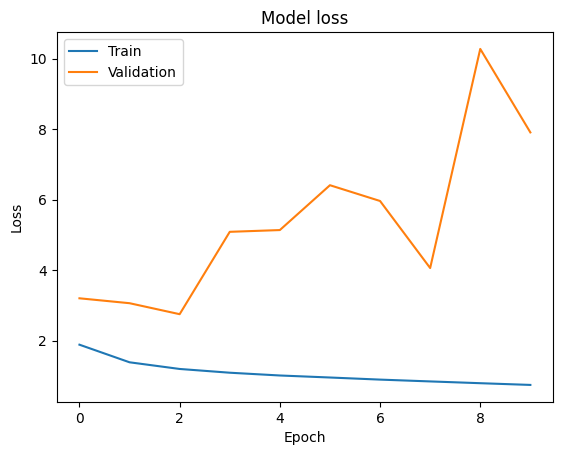

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

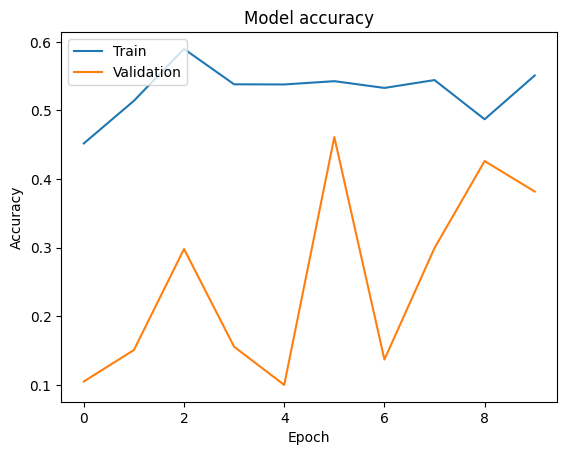

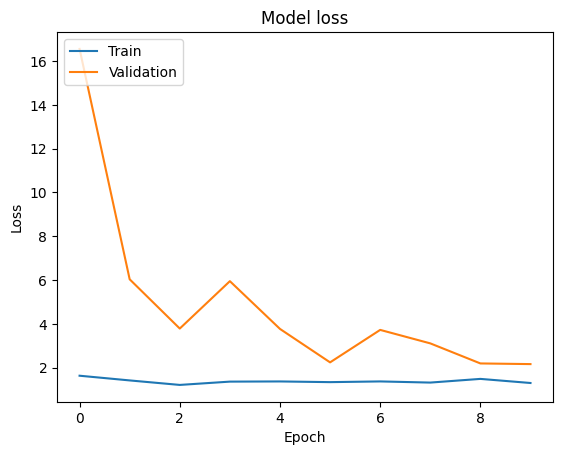

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()